In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 4]

In [ ]:
# Let's start by reading in some of these files
from os import listdir
from os.path import isfile, join

mypath='./sim_outputs'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
import re

pattern = re.compile('sim_outputs_1_[0-9]+\.txt\.gz')
bool(pattern.match('sim_outputs_15_100.txt.gz'))

In [ ]:
# Create a dataframe out of the ones for a specified step size 
import gzip 
import re
step_size = 15

specified_files = []
for file in gz_files:    
    pattern = re.compile(f'sim_outputs_{step_size}_[0-9]+\.txt\.gz')

    if bool(pattern.match(file)):
        specified_files.append(file)

sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

for file in specified_files[1:]:
    try:
        new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
        sim_df = pd.concat([sim_df, new_df])
    except:
        print(f"error file {file}")

In [ ]:
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

x = np.linspace(1, 10000, 10000)
y = 0.01/x

ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
ks_3, vs_3 = line_scat(sim_df["N11"])


plt.plot(np.array(ks_2), np.array(vs_2)/100000, label="site2")
plt.plot(np.array(ks_1), np.array(vs_1)/100000, label="site1")
plt.plot(np.array(ks_3), np.array(vs_3)/100000, label="double mutants")
plt.plot(x, y, label="hyperbolic expectation")

plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("AF")
plt.ylabel("frequency")
plt.title(f"Neutral Simulation with run multiplier {step_size}")
plt.savefig(f"plots/neutral_sim_AFs_{step_size}.pdf")
plt.show()

## Selection plots

In [ ]:
# Let's start by reading in some of these files
from os import listdir
from os.path import isfile, join

mypath='./sim_outputs/selection'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

beta_vals = [0.00223607, 0.00423899, 0.00803601, 0.01523415, 0.02887993, 0.05474871, 0.10378908, 0.19675666, 0.37299862, 0.70710678]

In [ ]:
# We now proceed to get all dataframes for a specific site pair
beta_vals = [0.00223607, 0.00423899, 0.00803601, 0.01523415, 0.02887993, 0.05474871, 0.10378908, 0.19675666, 0.37299862, 0.70710678]
site_1 = 1
site_2 = 4

site_1_pos = True
site_2_pos = False

import re

pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')

specified_files = []
for file in gz_files:    
    if bool(pattern.match(file)):
        specified_files.append(file)

# Build the dataframe
sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

for file in specified_files[1:]:
    try:
        new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
        sim_df = pd.concat([sim_df, new_df])
    except:
        print(f"error file {file}")

In [ ]:
# Let's create folders for all of the pairs of values
import os

parent_dir = './plots/selection/'
for i in range(10):
    for j in range(i, 10):
        directory = f'{i}_{j}'
        path = os.path.join(parent_dir, directory)
        os.mkdir(path)


In [ ]:
# Finally, we plot after subsetting for the signage we want
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

def buildSelectionPlot(beta_vals, sim_df, site_1, site_2, site_1_pos, site_2_pos):
    if site_1_pos:
        sim_df = sim_df[sim_df['beta_1'] > 0]
    else:
        sim_df = sim_df[sim_df['beta_1'] < 0]

    if site_2_pos:
        sim_df = sim_df[sim_df['beta_2'] > 0]
    else:
        sim_df = sim_df[sim_df['beta_2'] < 0]

    if site_1_pos:
        site_1_lab = ''
    else:
        site_1_lab = '-'

    if site_2_pos:
        site_2_lab = ''
    else:
        site_2_lab = '-'

    # x = np.linspace(1, 10000, 10000)
    # y = 0.01/x

    ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
    ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
    ks_3, vs_3 = line_scat(sim_df["N11"])


    plt.plot(np.array(ks_2), np.array(vs_2)/100000, label="site2")
    plt.plot(np.array(ks_1), np.array(vs_1)/100000, label="site1")
    plt.plot(np.array(ks_3), np.array(vs_3)/100000, label="double mutants")
    # plt.plot(x, y, label="hyperbolic expectation")

    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.legend()
    plt.xlabel("AF")
    plt.ylabel("frequency")
    plt.title(f"Simulation with beta_1 = {site_1_lab}{beta_vals[site_1]} and beta_2 = {site_2_lab}{beta_vals[site_2]}")
    plt.savefig(f"plots/selection/{site_1}_{site_2}/selection_sim_AFs_{site_1}_{site_2}_{site_1_pos}_{site_2_pos}.pdf")
    plt.close()


In [ ]:
import re

# Let's make plots for all pairs and all signs
for site_1 in range(3, 10):
    for site_2 in range(site_1, 10):
        # Build the dataframes
        pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')

        specified_files = []
        for file in gz_files:    
            if bool(pattern.match(file)):
                specified_files.append(file)

        # Build the dataframe
        sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

        for file in specified_files[1:]:
            try:
                new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
                sim_df = pd.concat([sim_df, new_df])
            except:
                print(f"error file {file}")
        
        # Now plot what we want
        for site_1_pos in [True, False]:
            for site_2_pos in [True, False]:
                buildSelectionPlot(beta_vals, sim_df, site_1, site_2, site_1_pos, site_2_pos)  

        print(f'finished pair ({site_1}, {site_2})')

# Integrating the SFS


The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

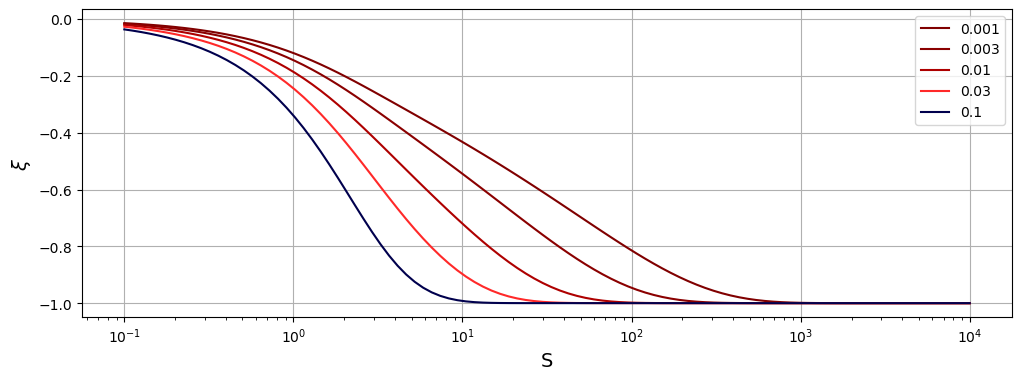

In [13]:
# This is the code to calculate the correlations from selection vals
import numpy as np
import scipy as sp
from scipy.special import erf
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize, LogNorm


def sfs_ud_params_sigma(xx, theta, S_ud):
    """Calculate the intensity of the site frequency spectrum under underdominant selection."""
    S_ud = np.abs(S_ud) + 1e-8
    return (theta*np.exp(-S_ud*xx*(1-xx))/(xx*(1-xx))*
                 (1 + erf(np.sqrt(S_ud)*(0.5-xx))/
                 erf(np.sqrt(S_ud)/2)))

ud_burden = lambda xx, theta, sigma: xx*sfs_ud_params_sigma(xx, theta, sigma)

def poly_prob(yy, sigma):
    return sp.integrate.quad(sfs_ud_params_sigma, yy, 1-yy, args=(1, sigma))[0]

def ex_burden(sigma):
    return sp.integrate.quad(ud_burden, 0, 1, args=(1, sigma))[0]

def stab_corr(yy, sigma, pos_d=True):
    burd = ex_burden(sigma)
    neut_prob = poly_prob(yy, 0)
    double_prob = poly_prob(yy, 4*sigma)
    single_prob = poly_prob(yy, sigma)
    if pos_d:
        return (double_prob - neut_prob) / (double_prob + neut_prob)
    else:
        return burd * (double_prob - neut_prob) / (burd * (double_prob + neut_prob) + single_prob**2)
    

cmap = get_cmap('seismic_r')
norm = Normalize(vmin=0.001, vmax=0.1)

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 100)

for MAF_thr in MAF_thr_values:
    corr_set = [stab_corr(MAF_thr, sigma, True) for sigma in sigma_set]
    plt.plot(sigma_set, corr_set, color=cmap(norm(MAF_thr)), label=str(MAF_thr))

plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize = 14)
plt.ylabel("$\\xi$", fontsize = 14)
plt.legend()
plt.show()

In [ ]:
## We're going to work with the simulations to plot the above curves
# 1. Find all instances where both variants satisfy the MAF threshold
# 2. Calculate correlations
# 3. Calculate the selection coefficients
# 4. Plot and use Fisher transformation for error bars
from scipy.stats import pearsonr

# Step 1
beta_vals = pd.read_csv('betas.txt', header=None).to_numpy().squeeze()
MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]

corr_df_pos = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
corr_df_neg = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
corr_df_tot = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
sample_df = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
for site in np.arange(len(beta_vals)):
        print(f'starting site {site}')
        sim_arr = np.load(f'/n/scratch/users/s/sjg319/dataframes/sim_dfs/sim_{site}_{site}.npy')
        sim_df = pd.DataFrame(sim_arr)
        sim_df = sim_df.iloc[:, 1:]
        sim_df.columns = ['beta_1', 'beta_2', 'N00', 'N01', 'N10', 'N11']
        sim_df[['N00', 'N01', 'N10', 'N11']] /= 20000
        for i, MAF_thr in enumerate(MAF_thr_values):
            try:
                # For the D > 0 case
                sub_df_pos = sim_df[(sim_df['N11']) > MAF_thr]
                
                # Step 2, calculate the correlation and store
                r = pearsonr(sub_df_pos['beta_1'], sub_df_pos['beta_2'])
                corr_df_pos.iloc[i, site] = r[0]
                # sample_df.iloc[i, site] = len(sub_df)
            except:
                print(f'missed D > 0 for site {site}, {MAF_thr}')

            try:
                # For the D < 0 case
                sub_df_neg = sim_df[(sim_df['N01']) > MAF_thr]
                sub_df_neg = sub_df_neg[(sub_df_neg['N10']) > MAF_thr]

                r = pearsonr(sub_df_neg['beta_1'], sub_df_neg['beta_2'])
                corr_df_neg.iloc[i, site] = r[0]
            except:
                 print(f'missed D < 0 for site {site}, {MAF_thr}')

            try:
                # For the total case
                sub_df_tot = sim_df[(sim_df['N01'] + sim_df['N11']) > MAF_thr]
                sub_df_tot = sub_df_tot[(sub_df_tot['N10'] + sub_df_tot['N11']) > MAF_thr]

                r = pearsonr(sub_df_tot['beta_1'], sub_df_tot['beta_2'])
                corr_df_tot.iloc[i, site] = r[0]
            except:
                print(f'missed all D for site {site}, {MAF_thr}')


In [ ]:
# corr_df.to_csv('dataframes/corr_csv', sep='\t')
# corr_df.T.plot()
# plt.xscale("log")
# corr_df.iloc[:, -1] = -1

cmap = get_cmap('seismic_r')
norm = Normalize(vmin=0.001, vmax=0.1)

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 100)

for MAF_thr in MAF_thr_values:
    corr_set = [stab_corr(MAF_thr, sigma) for sigma in sigma_set]
    plt.plot(sigma_set, corr_set, color=cmap(norm(MAF_thr)), label=str(MAF_thr))

for ind in corr_df.index:
    plt.plot(corr_df.columns, corr_df.loc[ind, :], label=(f'simulation {ind}'))

plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize = 14)
plt.ylabel("$\\xi$", fontsize = 14)
plt.legend()
plt.show()

# Dadi Simulator

In [2]:
import dadi
import pandas as pd
from dadi import PhiManip, Integration, Spectrum

xx = dadi.Numerics.default_grid(5000)
# We want to estimate phi for our given demography. First a 
# burn in period
phi = PhiManip.phi_1D(xx)
initial_pop = 14620
phi = Integration.one_pop(phi, xx, 100000, nu=initial_pop)

# Next, we want demography. Create a lambda function representing
# the population over time
populations = pd.read_csv('demo_Ns.txt', header=None).to_numpy().squeeze()
nu_func = lambda t : 2*populations[int(t)]
phi = Integration.one_pop(phi, xx, 999, nu=nu_func)

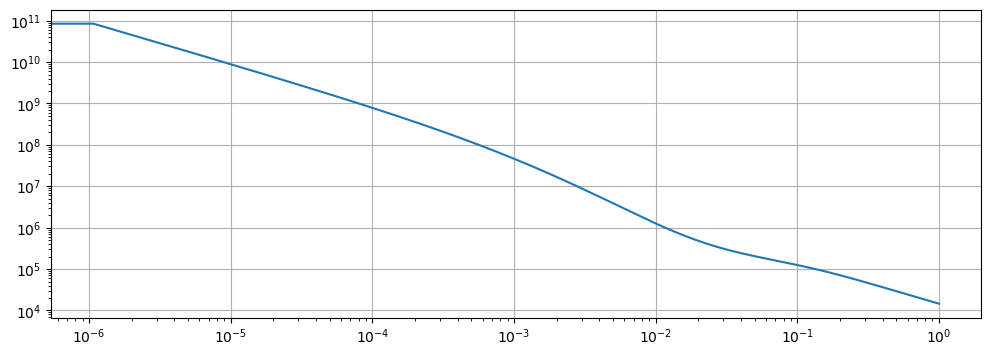

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# xx = dadi.Numerics.default_grid(60)
# plt.plot(xx, fs[1:])
# plt.plot(xx, phi1/np.max(phi1))
# plt.plot(xx, phi2/np.max(phi2), label='with exp growth')
plt.plot(xx, phi)
plt.yscale("log")
plt.xscale("log")
plt.grid()
# plt.legend()
plt.show()

# dadi.Plotting.plot_1d_fs(fs_three_epoch)

# Demography

In [3]:
import numpy as np

mypath='/n/scratch/users/s/sjg319/sim_outputs/demography'

# Define the function that builds the dfs
def buildDF(site_1, gz_files, site_2=None):
    if site_2:
        pattern = re.compile(f'sim_outs_single_{site_1}_{site_2}_[0-9]+\.txt\.gz')
    else:
        # pattern = re.compile(f'underdom_{site_1}_[0-9]+\.txt\.gz')
        pattern = re.compile(f'sim_outs_single_{site_1}_[0-9]+\.txt\.gz')
    specified_files = []
    for file in gz_files:    
        if bool(pattern.match(file)):
            specified_files.append(file)

    # Build the dataframe
    df_list = [pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip') for file in specified_files]
    sim_df = pd.concat(df_list)

    return sim_df

# Build the dataframe
df_list = [pd.read_csv(f'{mypath}/demography_selec_0_{i}.txt.gz', sep='\t', compression='gzip') for i in np.arange(1, 1001)]
sim_df = pd.concat(df_list)

invalid escape sequence '\.'invalid escape sequence '\.'invalid escape sequence '\.'invalid escape sequence '\.'invalid escape sequence '\.'invalid escape sequence '\.'

In [86]:
def windowSmoothing(vec, w_size):
    smoothed = vec

    for i in range(len(vec) - 2*w_size):
        smoothed[i+w_size] = np.mean(vec[(i+w_size): (i+2*w_size)])

    return smoothed

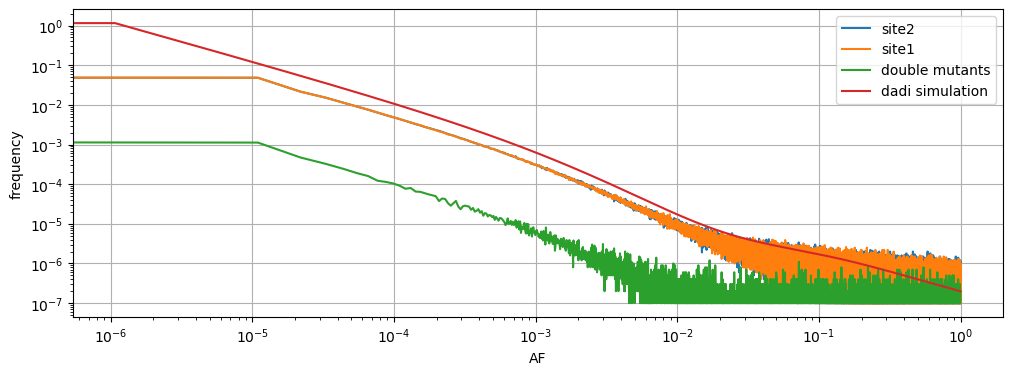

In [5]:
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
ks_3, vs_3 = line_scat(sim_df["N11"])

# vs_1 = windowSmoothing(vs_1, 50)
# vs_2 = windowSmoothing(vs_2, 50)
# vs_3 = windowSmoothing(vs_3, 50)

ks_1 = ks_1 / sim_df.iloc[0, :].sum()
ks_2 = ks_2 / sim_df.iloc[0, :].sum()
ks_3 = ks_3 / sim_df.iloc[0, :].sum()

plt.plot(np.array(ks_2), np.array(vs_2)/len(sim_df), label="site2")
plt.plot(np.array(ks_1), np.array(vs_1)/len(sim_df), label="site1")
plt.plot(np.array(ks_3), np.array(vs_3)/len(sim_df), label="double mutants")
# plt.plot(x, y, label="hyperbolic expectation")

# We rescale so that integrals are about the same

# phi
phi_int = 0
for i in range(len(phi) - 1):
    phi_int += phi[i]*(xx[i+1] - xx[i])

sim_int = 0
scale = np.array(vs_2)/len(sim_df)
for i in range(len(ks_2) - 1):
    sim_int += scale[i] * (ks_2[i+1] - ks_2[i])

phi_scale = sim_int * phi / phi_int

plt.plot(xx, phi_scale, label='dadi simulation')

plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("AF")
plt.ylabel("frequency")
plt.show()